## SARSA

In [1]:
import random
import math
import matplotlib.pyplot as plt

random.seed(42)

### Creating the Grid‑World Environment

Same setup as before:
- $5×5$ grid  
- Start at $(0, 0)$  
- Goal at $(4, 4)$
- Each step costs $–1$
- Reaching the goal gives $+10$

In [2]:
class GridWorld:
    def __init__(self, size=5):
        self.size = size
        self.start = (0, 0)
        self.goal = (size - 1, size - 1)
        self.reset()

    def reset(self):
        self.agent_pos = self.start
        return self.agent_pos

    def step(self, action):
        x, y = self.agent_pos
        if action == 'up':
            x = max(0, x - 1)
        elif action == 'down':
            x = min(self.size - 1, x + 1)
        elif action == 'left':
            y = max(0, y - 1)
        elif action == 'right':
            y = min(self.size - 1, y + 1)

        self.agent_pos = (x, y)
        if self.agent_pos == self.goal:
            return self.agent_pos, 10, True
        else:
            return self.agent_pos, -1, False

    def possible_actions(self):
        return ['up', 'down', 'left', 'right']

In [3]:
def init_q_table(env):
    Q = {}
    for i in range(env.size):
        for j in range(env.size):
            Q[(i, j)] = {a: 0.0 for a in env.possible_actions()}
    return Q

env = GridWorld()
Q = init_q_table(env)

### SARSA: State–Action–Reward–State–Action

This algorithm updates the Q-table by using the *action the agent actually took next* rather than the best possible one.

That makes SARSA like an *on-policy* algorithm — it learns based on the current behaviour (including randomness), not just the optimal choices.

In [7]:
def sarsa(env, Q, episodes=500, alpha=0.1, gamma=0.99, epsilon=0.1, max_steps=100):
    episode_rewards = []

    for ep in range(episodes):
        state = env.reset()
        total_reward = 0

        if random.random() < epsilon:
            action = random.choice(env.possible_actions())
        else:
            action = max(Q[state], key=Q[state].get)

        for _ in range(max_steps):
            next_state, reward, done = env.step(action)
            total_reward += reward

            if random.random() < epsilon:
                next_action = random.choice(env.possible_actions())
            else:
                next_action = max(Q[next_state], key=Q[next_state].get)

            td_target = reward + gamma * Q[next_state][next_action]
            td_error = td_target - Q[state][action]
            Q[state][action] += alpha * td_error

            state, action = next_state, next_action

            if done:
                break

        episode_rewards.append(total_reward)

    return Q, episode_rewards

Q, rewards = sarsa(env, Q)

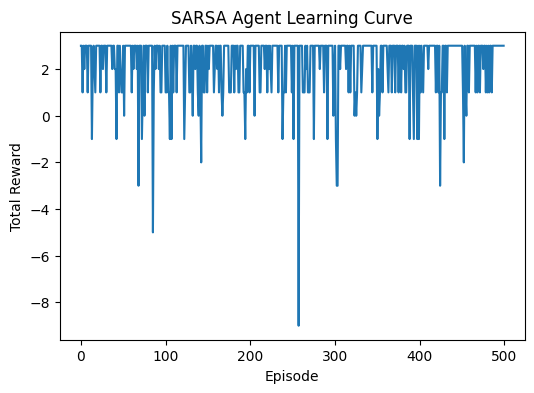

In [8]:
plt.figure(figsize=(6,4))
plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("SARSA Agent Learning Curve")
plt.show()

### Visualising the Final Policy

We extract the best action for each state and print an arrow to show what direction the agent prefers from that position.

In [9]:
policy = {}
for state, actions in Q.items():
    best_action = max(actions, key=actions.get)
    policy[state] = best_action

arrow = {'up': '↑', 'down': '↓', 'left': '←', 'right': '→'}

for i in range(env.size):
    row = ''
    for j in range(env.size):
        if (i, j) == env.goal:
            row += ' G  '
        else:
            row += f' {arrow[policy[(i,j)]]}  '
    print(row)

 →   →   ↓   ↓   ↓  
 →   →   ↓   ↓   ↓  
 →   →   ↓   ↓   ↓  
 →   →   →   →   ↓  
 ↓   →   →   →   G  


### What We’ve Understood from SARSA

#### Reinforcement Learning in Action  
SARSA is another example of reinforcement learning — where an agent learns by interacting with its environment, collecting rewards, and figuring out what to do next through trial and error.

Just like Q-learning, the agent doesn’t know anything about the world in advance. It explores by moving randomly at first, slowly building up experience to make smarter choices over time. The goal is to reach the destination while taking the fewest steps possible.

#### What Makes SARSA Different  
The main difference from Q-learning is how we update the Q-table. Instead of using the best possible next action to update values (like Q-learning does), SARSA uses the next action the agent *actually* took. This means SARSA learns in a way that reflects its current behaviour — including randomness and exploration.

So in short, SARSA is an **on-policy** method, as we've said previously. It learns from what it really does, not what it ideally should do.

This might make it learn a bit more slowly or conservatively than Q-learning, but it can also make it more stable in some environments — especially when exploration is an ongoing part of the agent’s behaviour.

#### What We Saw in This Notebook  
- We set up a small grid-world where the agent starts at one corner and aims for the opposite one.  
- We trained a SARSA agent that chose actions based on an ε-greedy strategy — sometimes random, sometimes smart.  
- The Q-values were updated using the reward and the next *actual* action chosen.  
- As training continued, we plotted the rewards and saw the agent improving.  
- The final policy — shown by arrows in each grid cell — revealed that the agent found a mostly direct path toward the goal.

By coding SARSA ourselves, we didn’t just use it — we *understood* it. That’s the power of building these algorithms from scratch.